# Vanishing Gradient

To handle vanishing gradient, reduce the model depth or complexity, use ReLU as an activation function instead of sigmoid and TanH
Do proper weight initialisation
Batch Normalisation - Batch Normalisation is a technique used in deep learning to improve the training process by normalising the activations of each layer by subtracting the Mini Batch mean and dividing by the Mini Batch Standard Deviation. This helps in better training and can lead to faster convergence and improved generalisation. Batch Normalisation is typically placed after a convolutional layer or fully connected layer and before the activation function.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential

In [ ]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

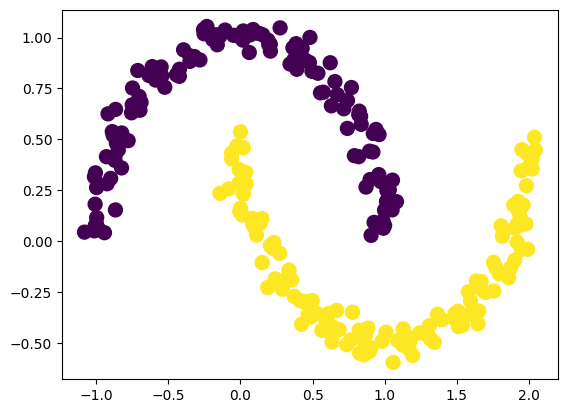

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.get_weights()[0]

array([[ 0.19741434, -0.21295655,  0.08574188, -0.2611948 , -0.20366961,
        -0.35578278,  0.34352833, -0.03377241,  0.33959168, -0.11389947],
       [ 0.07170326, -0.42616314, -0.45601675, -0.40621504,  0.12051654,
        -0.6853381 , -0.05099332, -0.20754609,  0.6350166 ,  0.12295181]],
      dtype=float32)

In [ ]:
old_weights = model.get_weights()[0]

In [ ]:
history = model.fit(X_train, y_train, batch_size=50, epochs = 100, verbose=1, validation_split=0.2)
# model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 647ms/step - accuracy: 0.4898 - loss: 0.7116 - val_accuracy: 0.5250 - val_loss: 0.6973
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5292 - loss: 0.6953 - val_accuracy: 0.5250 - val_loss: 0.6956
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5398 - loss: 0.6909 - val_accuracy: 0.5250 - val_loss: 0.6943
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4805 - loss: 0.7049 - val_accuracy: 0.5250 - val_loss: 0.6933
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5152 - loss: 0.6951 - val_accuracy: 0.5250 - val_loss: 0.6927
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4952 - loss: 0.6981 - val_accuracy: 0.5250 - val_loss: 0.6923
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5152 - loss: 0.6936 - val_accuracy: 0.5250 - val_loss: 0.6920
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5058 - loss: 0.6946 - val_accuracy: 0.5250 - val_loss

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
old_weights

array([[ 0.19741434, -0.21295655,  0.08574188, -0.2611948 , -0.20366961,
        -0.35578278,  0.34352833, -0.03377241,  0.33959168, -0.11389947],
       [ 0.07170326, -0.42616314, -0.45601675, -0.40621504,  0.12051654,
        -0.6853381 , -0.05099332, -0.20754609,  0.6350166 ,  0.12295181]],
      dtype=float32)

In [ ]:
new_weights

array([[ 0.2065656 , -0.21675074,  0.07761988, -0.2527917 , -0.22563477,
        -0.368009  ,  0.34606174, -0.03326092,  0.33618295, -0.12762287],
       [ 0.06476049, -0.42318034, -0.45012093, -0.41249293,  0.13711122,
        -0.6762523 , -0.05279781, -0.20794775,  0.6375117 ,  0.13317417]],
      dtype=float32)

In [ ]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [ ]:
percent_change

array([[ 4.6355624 ,  1.7816749 ,  9.472614  ,  3.2171745 , 10.784702  ,
         3.4364295 ,  0.7374664 ,  1.5145087 ,  1.0037731 , 12.048698  ],
       [ 9.682634  ,  0.6999186 ,  1.2928962 ,  1.5454595 , 13.769628  ,
         1.3257362 ,  3.538671  ,  0.19352849,  0.39291105,  8.31412   ]],
      dtype=float32)

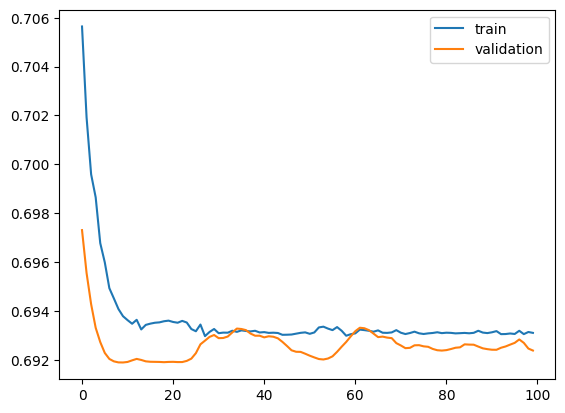

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

## Reducing model depth

In [ ]:
model_1 = Sequential()

model_1.add(Dense(10,activation='sigmoid',input_dim=2))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_1.get_weights()[0]

array([[ 0.62446624,  0.6767172 ,  0.342238  ,  0.1462332 , -0.07409418,
        -0.63580304,  0.16544491,  0.13575566,  0.6628873 ,  0.04195094],
       [ 0.32047766,  0.22409648, -0.04289269,  0.20119256,  0.68993694,
        -0.00086957,  0.6224057 ,  0.23627472,  0.19273823,  0.28567368]],
      dtype=float32)

In [ ]:
old_weights = model_1.get_weights()[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# model_1.fit(X_train, y_train, epochs = 100)
history = model_1.fit(X_train, y_train, batch_size=50, epochs = 100, verbose=1, validation_split=0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.5085 - loss: 0.8569 - val_accuracy: 0.5250 - val_loss: 0.8276
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5278 - loss: 0.8219 - val_accuracy: 0.5250 - val_loss: 0.8168
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5345 - loss: 0.8037 - val_accuracy: 0.5250 - val_loss: 0.8065
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4852 - loss: 0.8482 - val_accuracy: 0.5250 - val_loss: 0.7965
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5232 - loss: 0.7964 - val_accuracy: 0.5250 - val_loss: 0.7872
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5238 - loss: 0.7865 - val_accuracy: 0.5250 - val_loss: 0.7785
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4932 - loss: 0.8075 - val_accuracy: 0.5250 - val_loss: 0.7706
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4898 - loss: 0.8016 - val_accuracy: 0.5250 - val_loss

In [ ]:
new_weights = model_1.get_weights()[0]

In [ ]:
old_weights

array([[ 0.62446624,  0.6767172 ,  0.342238  ,  0.1462332 , -0.07409418,
        -0.63580304,  0.16544491,  0.13575566,  0.6628873 ,  0.04195094],
       [ 0.32047766,  0.22409648, -0.04289269,  0.20119256,  0.68993694,
        -0.00086957,  0.6224057 ,  0.23627472,  0.19273823,  0.28567368]],
      dtype=float32)

In [ ]:
new_weights

array([[ 0.99221474,  0.51532644,  0.44055128,  0.62302905, -0.4448712 ,
        -0.3142556 ,  0.4617501 ,  0.5089639 ,  0.26605383, -0.38725227],
       [-0.15172051,  0.4159407 , -0.24295488, -0.34757066,  1.1822221 ,
        -0.38334978,  0.21977913, -0.21967189,  0.6418045 ,  0.811011  ]],
      dtype=float32)

In [ ]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [ ]:
percent_change

array([[5.8890053e+01, 2.3849073e+01, 2.8726580e+01, 3.2605170e+02,
        5.0041318e+02, 5.0573433e+01, 1.7909598e+02, 2.7491174e+02,
        5.9864395e+01, 1.0231075e+03],
       [1.4734200e+02, 8.5607864e+01, 4.6642484e+02, 2.7275522e+02,
        7.1352203e+01, 4.3984871e+04, 6.4688766e+01, 1.9297308e+02,
        2.3299283e+02, 1.8389420e+02]], dtype=float32)

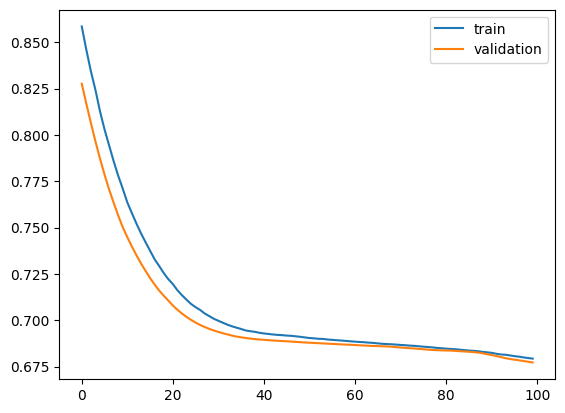

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

## Using ReLU as activation function

In [ ]:
model_2 = Sequential()

model_2.add(Dense(10,activation='relu',input_dim=2))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
old_weights = model_2.get_weights()[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# model_2.fit(X_train, y_train, epochs = 100)
history = model_2.fit(X_train, y_train, batch_size=50, epochs = 100, verbose=1, validation_split=0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 478ms/step - accuracy: 0.5168 - loss: 0.6931 - val_accuracy: 0.8500 - val_loss: 0.6927
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7263 - loss: 0.6928 - val_accuracy: 0.8000 - val_loss: 0.6921
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7720 - loss: 0.6922 - val_accuracy: 0.8750 - val_loss: 0.6918
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8185 - loss: 0.6919 - val_accuracy: 0.8250 - val_loss: 0.6911
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7727 - loss: 0.6914 - val_accuracy: 0.8250 - val_loss: 0.6901
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8120 - loss: 0.6903 - val_accuracy: 0.8250 - val_loss: 0.6891
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7860 - loss: 0.6893 - val_accuracy: 0.8250 - val_loss: 0.6882
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7800 - loss: 0.6887 - val_accuracy: 0.8500 - val_loss

In [ ]:
new_weights = model_2.get_weights()[0]

In [ ]:
old_weights

array([[ 0.39096695, -0.33298638,  0.40376085,  0.5378986 ,  0.674445  ,
         0.46498173,  0.29793268,  0.21463537, -0.12734973,  0.24768507],
       [ 0.45137018,  0.5235484 , -0.25018975,  0.36195546, -0.07599699,
        -0.5512646 ,  0.06985891,  0.26554388,  0.3731323 , -0.10467643]],
      dtype=float32)

In [ ]:
new_weights

array([[ 0.42034066, -0.45656216,  0.58095515,  0.5140825 ,  0.715071  ,
         0.5256486 ,  0.32786113,  0.24397686, -0.06043096,  0.3524117 ],
       [ 0.4396201 ,  0.4892776 , -0.41151914,  0.32284272, -0.11409602,
        -0.77798915,  0.08249523,  0.15411328,  0.42796037, -0.14021558]],
      dtype=float32)

In [ ]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [ ]:
percent_change

array([[ 7.5130916, 37.11136  , 43.885952 ,  4.4276204,  6.023627 ,
        13.047149 , 10.045372 , 13.670388 , 52.54724  , 42.282166 ],
       [ 2.603201 ,  6.5458746, 64.48281  , 10.805956 , 50.132282 ,
        41.128086 , 18.088343 , 41.963158 , 14.694005 , 33.951435 ]],
      dtype=float32)

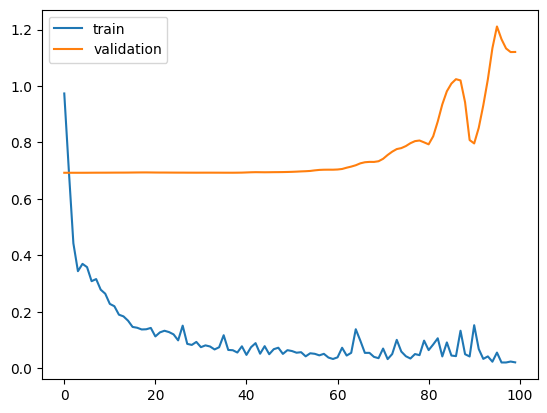

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

## Proper Weight Initialization

In [ ]:
model_3 = Sequential()

model_3.add(Dense(10,activation='sigmoid',input_dim=2, kernel_initializer='glorot_normal')) # default Glorot Uniform other options he_normal, he_uniform
model_3.add(Dense(10,activation='sigmoid'))   # The Xavier initialization (or Glorot initialization) is a popular technique
model_3.add(Dense(10,activation='sigmoid'))   # - for initializing weights in a neural network
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_3.get_weights()[0]

array([[ 0.09078782,  0.26704893, -0.32376933, -0.21228148, -0.05284472,
        -0.35033092, -0.67457837,  0.6933169 , -0.54002076,  0.5542526 ],
       [-0.66898984, -0.4536922 ,  0.5237103 , -0.21813755, -0.20076102,
         0.7747084 ,  0.2968045 ,  0.65126526,  0.05278856, -0.20968957]],
      dtype=float32)

In [ ]:
old_weights = model_3.get_weights()[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# model_3.fit(X_train, y_train, epochs = 100)
history = model_3.fit(X_train, y_train, batch_size=50, epochs = 100, verbose=1, validation_split=0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 636ms/step - accuracy: 0.4795 - loss: 0.7484 - val_accuracy: 0.4750 - val_loss: 0.7450
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5122 - loss: 0.7233 - val_accuracy: 0.4750 - val_loss: 0.7392
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5208 - loss: 0.7142 - val_accuracy: 0.4750 - val_loss: 0.7336
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4595 - loss: 0.7406 - val_accuracy: 0.4750 - val_loss: 0.7283
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5068 - loss: 0.7133 - val_accuracy: 0.4750 - val_loss: 0.7235
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4815 - loss: 0.7203 - val_accuracy: 0.4750 - val_loss: 0.7193
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4928 - loss: 0.7122 - val_accuracy: 0.4750 - val_loss: 0.7160
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4708 - loss: 0.7171 - val_accuracy: 0.4750 - val_loss

In [ ]:
new_weights = model_3.get_weights()[0]

In [ ]:
old_weights

array([[ 0.09078782,  0.26704893, -0.32376933, -0.21228148, -0.05284472,
        -0.35033092, -0.67457837,  0.6933169 , -0.54002076,  0.5542526 ],
       [-0.66898984, -0.4536922 ,  0.5237103 , -0.21813755, -0.20076102,
         0.7747084 ,  0.2968045 ,  0.65126526,  0.05278856, -0.20968957]],
      dtype=float32)

In [ ]:
new_weights

array([[ 0.07627884,  0.27037254, -0.33236226, -0.20645866, -0.06773087,
        -0.35572234, -0.67128175,  0.6865018 , -0.53953123,  0.5621233 ],
       [-0.6579513 , -0.45600992,  0.53067166, -0.2229024 , -0.18914267,
         0.77863216,  0.29348502,  0.657135  ,  0.05231098, -0.21703812]],
      dtype=float32)

In [ ]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [ ]:
percent_change

array([[15.981202  ,  1.2445714 ,  2.6540294 ,  2.7429724 , 28.169596  ,
         1.5389503 ,  0.48869246,  0.98296696,  0.09065077,  1.4200518 ],
       [ 1.6500313 ,  0.51085883,  1.3292359 ,  2.184335  ,  5.7871523 ,
         0.506484  ,  1.1184036 ,  0.9012835 ,  0.9046867 ,  3.504491  ]],
      dtype=float32)

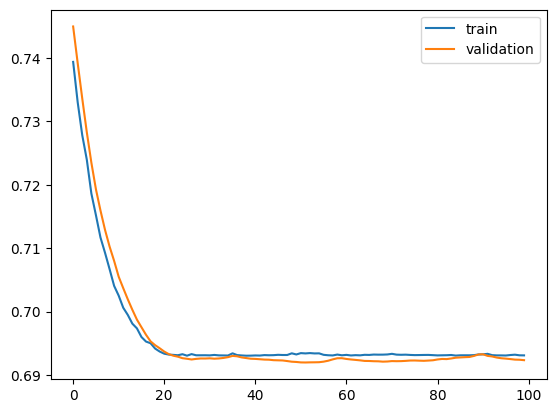

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

## Batch Normalization

In [ ]:
model_4 = Sequential()

model_4.add(Dense(10,activation='sigmoid',input_dim=2, kernel_initializer='glorot_normal')) # default Glorot Uniform
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_4.get_weights()[0]

array([[ 0.0530152 , -0.09931558, -0.0412581 ,  0.67654973,  0.38782844,
         0.77673805, -0.01285226,  0.05096283, -0.6535845 ,  0.5121104 ],
       [ 0.25846246, -0.5504572 , -0.15333726, -0.21160634,  0.40669116,
        -0.09329741, -0.8932759 , -0.46448946, -0.23297353, -0.06923927]],
      dtype=float32)

In [ ]:
old_weights = model_4.get_weights()[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# model_4.fit(X_train, y_train, epochs = 100, batch_size=20)
history = model_4.fit(X_train, y_train, batch_size=50, epochs = 100, verbose=1, validation_split=0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4333 - loss: 1.0335 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6152 - loss: 0.7385 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7952 - loss: 0.4424 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8710 - loss: 0.3593 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8870 - loss: 0.3478 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8680 - loss: 0.3799 - val_accuracy: 0.5250 - val_loss: 0.6925
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8682 - loss: 0.3084 - val_accuracy: 0.5250 - val_loss: 0.6926
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8752 - loss: 0.3103 - val_accuracy: 0.5250 - val_loss: 

In [ ]:
new_weights = model_4.get_weights()[0]

In [ ]:
old_weights

array([[ 0.00508238,  0.05596799, -0.48485056,  0.3916051 ,  0.6152853 ,
         0.2707292 ,  0.6496399 , -0.18377298, -0.5767786 , -0.4150968 ],
       [ 0.9217386 ,  0.3275178 ,  0.21684073, -0.6069877 , -0.69109505,
        -0.34902436, -0.63477427,  0.4941764 , -0.4517144 ,  0.02856588]],
      dtype=float32)

In [ ]:
new_weights

array([[-0.02248143,  0.07871341, -0.56168765,  0.41115063,  0.670851  ,
         0.27434492,  0.568953  , -0.18557803, -0.5977867 , -0.3744404 ],
       [ 0.862098  ,  0.32603025,  0.19168282, -0.62835693, -0.70498973,
        -0.35140043, -0.6285713 ,  0.5039653 , -0.4297869 ,  0.01973547]],
      dtype=float32)

In [ ]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [ ]:
percent_change

array([[5.4234058e+02, 4.0640049e+01, 1.5847583e+01, 4.9911313e+00,
        9.0308867e+00, 1.3355438e+00, 1.2420255e+01, 9.8221844e-01,
        3.6423221e+00, 9.7944355e+00],
       [6.4704509e+00, 4.5418999e-01, 1.1602024e+01, 3.5205357e+00,
        2.0105305e+00, 6.8077761e-01, 9.7719711e-01, 1.9808576e+00,
        4.8542852e+00, 3.0912432e+01]], dtype=float32)

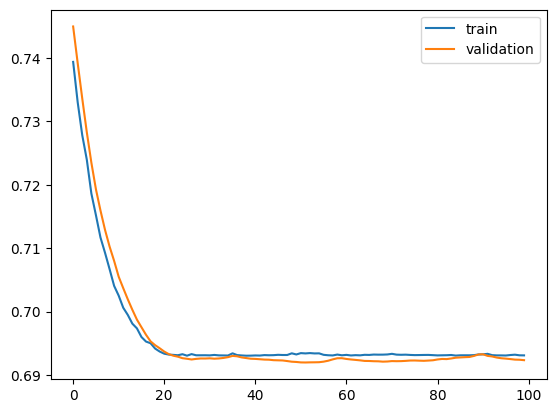

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])